In [266]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [267]:
sentences = [ "i like dog", "i love coffee", "i hate milk"]

word_list = " ".join(sentences).split()
word_list = list(set(word_list))
word_dict = {w: i for i, w in enumerate(word_list)}
number_dict = {i: w for i, w in enumerate(word_list)}
n_class = len(word_dict) # number of Vocabulary

In [268]:
n_step = 2 # number of steps ['i like', 'i love', 'i hate']
n_hidden = 2 # number of hidden units

In [269]:
def make_batch(sentences):
    input_batch = []
    target_batch = []

    for sen in sentences:
        word = sen.split()
        input = [word_dict[n] for n in word[:-1]]
        target = word_dict[word[-1]]

        input_batch.append(np.eye(n_class)[input].reshape(1, -1))
        target_batch.append(np.eye(n_class)[target])

    return np.array(input_batch), np.array(target_batch)

In [270]:
def MyModel():
    model = tf.keras.Sequential()
    
    model.add(tf.keras.layers.Dense(n_hidden, activation='tanh'))
    model.add(tf.keras.layers.Dense(n_class, activation='tanh'))
    
    return model

In [271]:
model = MyModel()

In [272]:
input_batch, target_batch = make_batch(sentences)

In [275]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [277]:
print('# Fit model on training data')

history = model.fit(input_batch, target_batch, epochs=1000, batch_size=1)

# Fit model on training data
Train on 3 samples
Epoch 1/1000
3/3 [==============================] - 0s 8ms/sample - loss: 0.8992 - categorical_accuracy: 0.6667
Epoch 2/1000
3/3 [==============================] - 0s 5ms/sample - loss: 0.8991 - categorical_accuracy: 0.6667
Epoch 3/1000
3/3 [==============================] - 0s 5ms/sample - loss: 0.8990 - categorical_accuracy: 0.6667
Epoch 4/1000
3/3 [==============================] - 0s 6ms/sample - loss: 0.8989 - categorical_accuracy: 0.6667
Epoch 5/1000
3/3 [==============================] - 0s 6ms/sample - loss: 0.8988 - categorical_accuracy: 0.6667
Epoch 6/1000
3/3 [==============================] - 0s 5ms/sample - loss: 0.8987 - categorical_accuracy: 0.6667
Epoch 7/1000
3/3 [==============================] - 0s 6ms/sample - loss: 0.8986 - categorical_accuracy: 0.6667
Epoch 8/1000
3/3 [==============================] - 0s 6ms/sample - loss: 0.8985 - categorical_accuracy: 0.6667
Epoch 9/1000
3/3 [==============================] - 0s 6

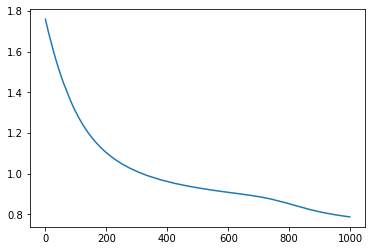

In [256]:
plt.plot(history.history['loss'])

In [278]:
model.predict(input_batch).shape

(3, 1, 7)

In [279]:
predict = np.argmax(model.predict(input_batch), axis=2).reshape(-1)

In [280]:
input = [sen.split()[:2] for sen in sentences]
print([sen.split()[:2] for sen in sentences], '->', [number_dict[n] for n in predict])
print(sentences)

[['i', 'like'], ['i', 'love'], ['i', 'hate']] -> ['dog', 'coffee', 'milk']
['i like dog', 'i love coffee', 'i hate milk']
